In [4]:
# Standard deep q network

from dqn import DQN

dqn = DQN(dueling=False)
dqn.learning()

2024-11-11 15:51:44.323214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-11 15:51:45.643393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [6]:
# Traning ddqn network
from dqn import DQN

ddqn = DQN(dueling=True)
ddqn.learning()

2024-11-11 16:53:48.246194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:53:52.771891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Iteration 1000 reward: 0.664
Iteration 2000 reward: 0.7
Iteration 3000 reward: 0.7356666666666667
Iteration 4000 reward: 0.767
Iteration 5000 reward: 0.8062
Iteration 6000 reward: 0.836
Iteration 7000 reward: 0.8674285714285714
Iteration 8000 reward: 0.90425
Iteration 9000 reward: 0.9333333333333333
Iteration 10000 reward: 0.9555
Iteration 11000 reward: 0.9845454545454545
Iteration 12000 reward: 1.0084166666666667
Iteration 13000 reward: 1.0266923076923078
Iteration 14000 reward: 1.0494285714285714
Iteration 15000 reward: 1.0648
Iteration 16000 reward: 1.081375
Iteration 17000 reward: 1.0927647058823529
Iteration 18000 reward: 1.1058333333333332
Iteration 19000 reward: 1.1188421052631579
Iteration 20000 reward: 1.13495
Iteration 21000 reward: 1.1434285714285715
Iteration 22000 reward: 1.154409090909091
Iteration 23000 reward: 1.1622173913043479
Iteration 24000 reward: 1.1704166666666667
Iteration 25000 reward: 1.1792
Iteration 26000 reward: 1.1871153846153846
Iteration 27000 reward: 1.

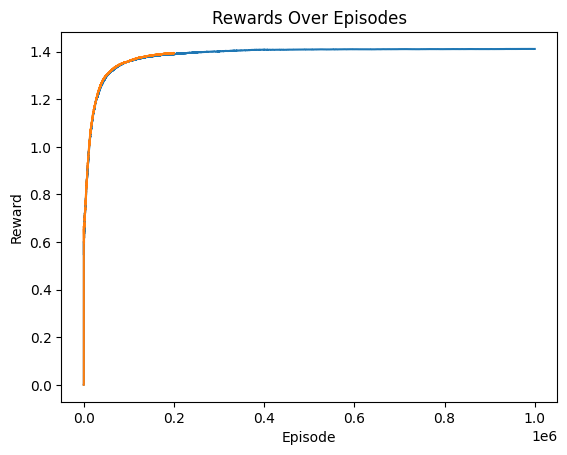

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dqn_rewards = np.load('model/dqn.npy')
ddqn_rewards = np.load('model/ddqn.npy')

plt.plot(dqn_rewards)
plt.plot(ddqn_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Episodes')
plt.show()

In [2]:
import tensorflow as tf

new_model = tf.keras.models.load_model('model/ddqn.keras')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          2048        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           16448       dense_1[0][0]                    
______________________________________________________________________________________________

In [6]:
import numpy as np

from q_learning_agent import QLearningAgent
q_learning_agent = QLearningAgent()
q_learning_agent.learning()
np.save('model/q_learning_rewards.npy', q_learning_agent.rewards)


Iteration 1000 reward: 0.657
Iteration 2000 reward: 0.6805
Iteration 3000 reward: 0.6916666666666667
Iteration 4000 reward: 0.70325
Iteration 5000 reward: 0.7126
Iteration 6000 reward: 0.7123333333333334
Iteration 7000 reward: 0.7267142857142858
Iteration 8000 reward: 0.739125
Iteration 9000 reward: 0.749
Iteration 10000 reward: 0.7651
Iteration 11000 reward: 0.7761818181818182
Iteration 12000 reward: 0.7885833333333333
Iteration 13000 reward: 0.803
Iteration 14000 reward: 0.8147857142857143
Iteration 15000 reward: 0.8299333333333333
Iteration 16000 reward: 0.845875
Iteration 17000 reward: 0.8613529411764705
Iteration 18000 reward: 0.8732222222222222
Iteration 19000 reward: 0.8872105263157894
Iteration 20000 reward: 0.90095
Iteration 21000 reward: 0.9131428571428571
Iteration 22000 reward: 0.9275
Iteration 23000 reward: 0.941
Iteration 24000 reward: 0.9501666666666667
Iteration 25000 reward: 0.962
Iteration 26000 reward: 0.9721153846153846
Iteration 27000 reward: 0.9825555555555555
Ite

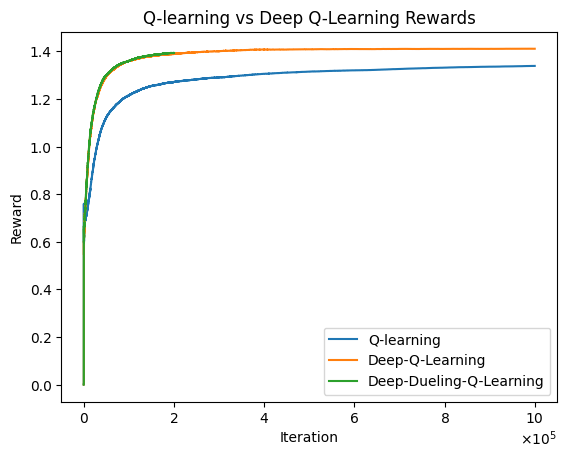

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

q_learning_rewards = np.load('model/q_learning_rewards.npy')
dqn_rewards = np.load('model/dqn.npy')
ddqn_rewards = np.load('model/ddqn.npy')

plt.plot(q_learning_rewards, label='Q-learning')
plt.plot(dqn_rewards, label='Deep-Q-Learning')
plt.plot(ddqn_rewards, label='Deep-Dueling-Q-Learning')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Q-learning vs Deep Q-Learning Rewards')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(5, 5))  # Set x-axis labels in millions
plt.legend()
plt.show()